จาก [Notebook ที่แล้ว ที่เราทำ Image Classification ด้วย ResNet34](https://www.bualabs.com/archives/469/how-to-deep-learning-pets-cats-dogs-image-classification-with-fastai-v1-ep-1/) คราวนี้เราจะมาลองเทรนด้วย ResNet50 ซึ่งเป็นโมเดลที่ใหญ่ขึ้นซับซ้อนขึ้น ว่าความแม่นยำจะแตกต่างกันอย่างไร

# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล



In [3]:
path = untar_data(URLs.PETS)
path_images = path/'images'
filenames = get_image_files(path_images)

# 3. เตรียมข้อมูล

เพิ่มขนาดรูปจาก 224 เป็น 299 และลดขนาด batch size เหลือ 64 เนื่องจากโมเดลที่ขนาดใหญ่ขึ้น มีความต้องการ Memory ที่มากขึ้น ถ้าใช้ Batch Size เท่าเดิมจะทำให้ Error GPU Out of Memory ได้

In [4]:
batchsize = 64
np.random.seed(0)
regex_pattern = r'/([^/]+)_\d+.jpg$'

databunch = ImageDataBunch.from_name_re(path_images, filenames, 
                                   regex_pattern, ds_tfms=get_transforms(), 
                                   size=299, bs=batchsize).normalize(imagenet_stats)

# 4. สร้างโมเดล

เปลี่ยนจาก models.resnet34 เป็น models.resnet50

In [5]:
learner = cnn_learner(databunch, models.resnet50, metrics=accuracy)

# 5. เริ่มต้นเทรนโมเดล

เทรนด้วยค่า Default ไป 8 Cycle

In [6]:
learner.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.089840,0.277463,0.926928,00:59
1,0.480243,0.244529,0.912043,00:51
2,0.290893,0.227280,0.926252,00:51
3,0.212821,0.190608,0.939107,00:51
4,0.164005,0.178665,0.938430,00:51
5,0.133095,0.167353,0.949932,00:52
6,0.099854,0.159132,0.947903,00:51
7,0.082593,0.156562,0.951962,00:51


เรามา Save Model ที่เราเพิ่งเทรนไปเก็บไว้ก่อน

In [7]:
learner.save('resnet50-1')

โหลดโมเดลที่เรา Save ไว้ ขึ้นมาใหม่ เตรียมเทรนในขึ้นตอนถัดไป (ที่คอมเม้นท์ไว้ เพราะถ้าไม่ได้เปลี่ยนอะไรก็จะได้ไม่ต้องรัน)

In [8]:
# learner.load('resnet50-1')

# 6. เทรนต่อ

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


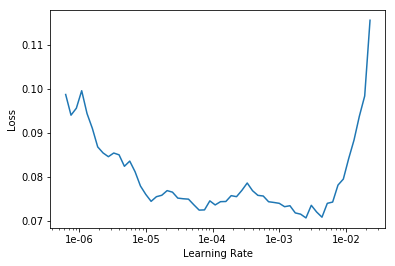

In [9]:
learner.lr_find()
learner.recorder.plot()

unfreeze layer ทุก Layer ให้สามารถเทรนได้ แล้วเทรนต่อทั้งโมเดล

In [10]:
learner.unfreeze()
learner.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.079888,0.152102,0.951286,01:05
1,0.070990,0.154257,0.951962,01:03
2,0.062629,0.154986,0.956022,01:03


## สำเร็จแล้ว ##

เพียงแค่เวลา 10 นาทีเศษ เราเทรน Model ได้ accuracy ประมาณ 0.956 หรือ ความแม่นยำประมาณ 95%

เปรียบเทียบกับ 94.0% จาก ResNet34 ที่เราเทรนครั้งก่อน 

เรามา Save Model ที่เราเพิ่งเทรนไปเก็บไว้ก่อน

In [11]:
learner.save('resnet50-2')

# 7. ดูผลลัพธ์

In [12]:
interpretation = ClassificationInterpretation.from_learner(learner)

เรียกดู most_confused คือ พันธุ์ที่โมเดลทายผิดมากที่สุดเรียงลงไป

In [13]:
interpretation.most_confused(min_val=2)

[('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Siamese', 'Birman', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Bengal', 'Abyssinian', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('shiba_inu', 'Maine_Coon', 2),
 ('wheaten_terrier', 'havanese', 2)]

# 8. สรุป


เปรียบเทียบกับเคสก่อนที่ใช้ ResNet34 แล้วเคสนี้เราใช้ ResNet50 

* โมเดลใช้เวลาในการเทรนนานขึ้น 
* ใช้ memory GPU มากขึ้น 
* ประสิทธิภาพความแม่นยำดีขึ้น ประมาณ 1%

# Credit 

* [FastAI: Practical Deep Learning for Coders, v3 - Lesson 1](https://course.fast.ai/videos/?lesson=1)